# Training AutoEncoders to denoise the cell image data

In [2]:
# required basic libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
import os
import seaborn as sns

In [3]:
data_dir="./cell_images"
print("The path contains {}".format(os.listdir(data_dir)))
test_path = data_dir+'/test/' # we only use the uninfected images for this purpose
train_path = data_dir+'/train/' # we only use the uninfected images for this purpose
print("The test path contains {}".format(os.listdir(test_path)))
print("The train path contains {}".format(os.listdir(train_path)))

The path contains ['test', 'train']
The test path contains ['uninfected', 'uninfected_reshaped']
The train path contains ['uninfected', 'uninfected_reshaped']


In [4]:
test_path = data_dir+'/test/' # we only use the uninfected images for this purpose
train_path = data_dir+'/train/' # we only use the uninfected images for this purpose

In [5]:
# let's grab the first image and show it 
os.listdir(train_path)[0]

'uninfected'

In [6]:
train_path

'./cell_images/train/'

## Looking at the data and some preprocessing (Jump into Loading the data part if you have run this section once)

In [ ]:
# looking a samples of data

print("Looking at samples from train data ......")
print("")
for n in range(3):
    para_cell = train_path+'uninfected/'+os.listdir(train_path+"/uninfected")[n]
    para_img= imread(para_cell)
    print("The image shape is {}".format(para_img.shape))
    plt.imshow(para_img)
    plt.show()

print("")
print("Looking at samples from test data ......")
print("")
for n in range(3):
    para_cell = test_path+'uninfected/'+os.listdir(test_path+"/uninfected")[n]
    para_img= imread(para_cell)
    print("The image shape is {}".format(para_img.shape))
    plt.imshow(para_img)
    plt.show()

    
    
# We see that the samples are not of equal shape. 

In [ ]:
# Looking at distributions of samples size
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/uninfected'):
    
    img = imread(train_path+'/uninfected'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)
    
sns.jointplot(dim1,dim2) # This shows that dimensions of images are different
print("The mean dimension is ({} , {})".format(np.mean(dim1),np.mean(dim2)))

In [ ]:
image_shape = (130,130,3) # we set the image size approximately equal to the mean dmensions value.

In [ ]:
# Resizing images to be of equal size (130,130,3)
import PIL
import os
from PIL import Image

# train data
for image_filename in os.listdir(train_path+'/uninfected'):
    img = Image.open(train_path+'/uninfected'+'/'+image_filename)
    img = img.resize(image_shape[:2])
    img.save(train_path+'/uninfected_reshaped'+'/'+image_filename)

# test data
for image_filename in os.listdir(test_path+'/uninfected'):
    img = Image.open(test_path+'/uninfected'+'/'+image_filename)
    img = img.resize(image_shape[:2])
    img.save(test_path+'/uninfected_reshaped'+'/'+image_filename)

In [ ]:
# looking a samples of reshaped data
for n in range(3):
    para_cell = train_path+'uninfected_reshaped/'+os.listdir(train_path+"/uninfected_reshaped")[n]
    para_img= imread(para_cell)
    print("The image shape is {}".format(para_img.shape))
    plt.imshow(para_img)
    plt.show()
# We see that the samples are of equal shapes now. 

In [ ]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path+'/uninfected_reshaped'):
    
    img = imread(train_path+'/uninfected_reshaped'+'/'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [ ]:
sns.jointplot(x=dim1,y=dim2) # This shows that dimensions of images are fixed now
print("The mean dimension of the reshaped shapes is ({} , {})".format(np.mean(dim1),np.mean(dim2)))

In [ ]:
# Adding some noise and looking at samples of noisy data
from tensorflow.keras.layers import GaussianNoise
sample = GaussianNoise(0.2)
for n in range(3):
    para_cell = train_path+'uninfected_reshaped/'+os.listdir(train_path+"/uninfected_reshaped")[n]
    para_img= imread(para_cell)
    noisey = sample(para_img,training=True)
    plt.imshow(noisey)
    plt.show()

# Loading the data

In [7]:
# train data
X_train=[]    
for i in range(1000):  # if you want to take a part of data you can use range(100) for example to get 100 images only fot the whole dataset will use len(os.listdir(train_path+"/uninfected_reshaped"))
    para_cell=train_path+'uninfected_reshaped/'+os.listdir(train_path+"/uninfected_reshaped")[i]
    para_img= imread(para_cell)
    X_train.append(para_img)

In [8]:
X_train=np.asarray(X_train)

In [9]:
X_train[0] # looking at one train image

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [10]:
image_shape=X_train.shape[1:]
image_shape

(130, 130, 3)

In [11]:
# test data
X_test=[]
for i in range(200): 
    para_cell=test_path+'uninfected_reshaped/'+os.listdir(test_path+"/uninfected_reshaped")[i]
    para_img= imread(para_cell)
    X_test.append(para_img)

In [12]:
X_test=np.asarray(X_test)

In [13]:
X_test.shape 

(200, 130, 130, 3)

In [14]:
# import tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import GaussianNoise

In [15]:
130*130


16900

In [16]:
# TO create the exact same noise as us (optional)
tf.random.set_seed(101)
np.random.seed(101)


encoder = Sequential()
encoder.add(Flatten(input_shape=[130,130,3]))
# Add noise to images before going through autoencoder
encoder.add(GaussianNoise(0.2))
encoder.add(Dense(16000,activation="relu"))
encoder.add(Dense(8000,activation="relu"))
encoder.add(Dense(4000,activation="relu"))
encoder.add(Dense(2000,activation="relu"))
encoder.add(Dense(1000,activation="relu"))
encoder.add(Dense(500,activation="relu"))
encoder.add(Dense(250,activation="relu"))
encoder.add(Dense(125,activation="relu"))


decoder = Sequential()
decoder.add(Dense(250,input_shape=[125],activation='relu'))
decoder.add(Dense(500,activation='relu'))
decoder.add(Dense(1000,activation='relu'))
decoder.add(Dense(2000,activation='relu'))
decoder.add(Dense(4000,activation='relu'))
decoder.add(Dense(8000,activation='relu'))
decoder.add(Dense(16000,activation='relu'))
decoder.add(Dense(130 * 130 * 3, activation="sigmoid"))
decoder.add(Reshape([130, 130,3]))

model= Sequential([encoder, decoder])

model.compile(loss="binary_crossentropy", optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 125)               981888125 
_________________________________________________________________
sequential_1 (Sequential)    (None, 130, 130, 3)       981938700 
Total params: 1,963,826,825
Trainable params: 1,963,826,825
Non-trainable params: 0
_________________________________________________________________


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [18]:
batch_size = 256                       

In [19]:
#import warnings
#warnings.filterwarnings('ignore')

In [20]:
model.fit(X_train,X_train,epochs=100,batch_size=batch_size,validation_data=(X_test,X_test),callbacks=[early_stop])

Epoch 1/100
4/4 [==============================] - 65s 16s/step - loss: 1.2266 - accuracy: 0.4502 - val_loss: 0.6924 - val_accuracy: 0.3940
Epoch 2/100
4/4 [==============================] - 63s 15s/step - loss: 0.6926 - accuracy: 0.4023 - val_loss: 0.6897 - val_accuracy: 0.4123
Epoch 3/100
4/4 [==============================] - 56s 13s/step - loss: 0.6887 - accuracy: 0.5468 - val_loss: 0.6877 - val_accuracy: 0.4818
Epoch 4/100
4/4 [==============================] - 51s 13s/step - loss: 0.7021 - accuracy: 0.4904 - val_loss: 0.6832 - val_accuracy: 0.5873
Epoch 5/100
4/4 [==============================] - 68s 19s/step - loss: 0.6741 - accuracy: 0.7690 - val_loss: 0.6880 - val_accuracy: 0.8422
Epoch 6/100
4/4 [==============================] - 68s 17s/step - loss: 0.6723 - accuracy: 0.8009 - val_loss: 0.6738 - val_accuracy: 0.6948
Epoch 7/100
4/4 [==============================] - 76s 19s/step - loss: 0.6707 - accuracy: 0.6517 - val_loss: 0.6133 - val_accuracy: 0.7899
Epoch 8/100
4/4 [===

4/4 [==============================] - 57s 15s/step - loss: 0.5185 - accuracy: 0.9905 - val_loss: 0.5218 - val_accuracy: 0.9911
Epoch 60/100
4/4 [==============================] - 82s 14s/step - loss: 0.5176 - accuracy: 0.9911 - val_loss: 0.5218 - val_accuracy: 0.9907
Epoch 61/100
4/4 [==============================] - 67s 18s/step - loss: 0.5173 - accuracy: 0.9903 - val_loss: 0.5221 - val_accuracy: 0.9906
Epoch 62/100
4/4 [==============================] - 58s 13s/step - loss: 0.5167 - accuracy: 0.9904 - val_loss: 0.5212 - val_accuracy: 0.9860
Epoch 63/100
4/4 [==============================] - 58s 14s/step - loss: 0.5165 - accuracy: 0.9877 - val_loss: 0.5215 - val_accuracy: 0.9889
Epoch 64/100
4/4 [==============================] - 47s 12s/step - loss: 0.5168 - accuracy: 0.9878 - val_loss: 0.5210 - val_accuracy: 0.9869
Epoch 65/100
4/4 [==============================] - 63s 18s/step - loss: 0.5158 - accuracy: 0.9880 - val_loss: 0.5199 - val_accuracy: 0.9845
Epoch 66/100
4/4 [========

In [21]:
losses = pd.DataFrame(model.history.history)

In [22]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.226632,0.450229,0.692414,0.393992
1,0.692597,0.402344,0.689651,0.412283
2,0.688664,0.546818,0.687745,0.481797
3,0.702147,0.490363,0.683212,0.587277
4,0.674108,0.769036,0.687957,0.842213


<AxesSubplot:>

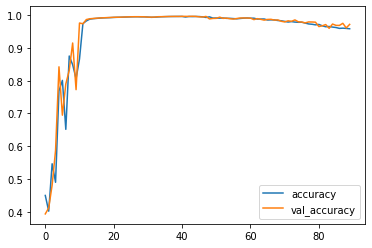

In [23]:
losses[['accuracy','val_accuracy']].plot()

In [29]:
# generating noisy images and feed them into the model
sample = GaussianNoise(0.2)
noisey_images = sample(X_test,training=True)
denoised = model.predict(noisey_images)

The Original: 


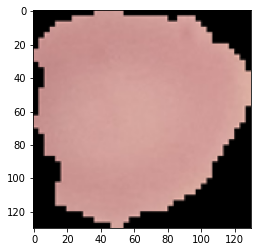

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


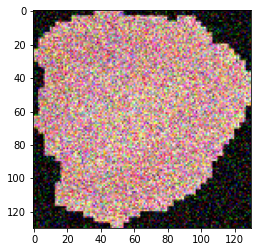

After going through denoiser


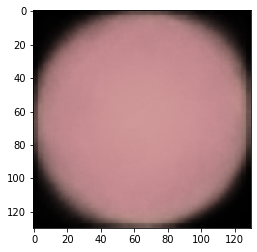

The Original: 


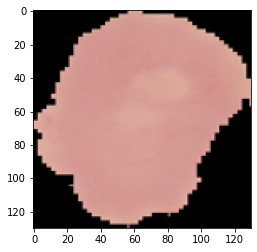

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


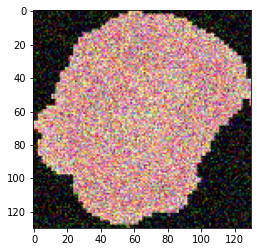

After going through denoiser


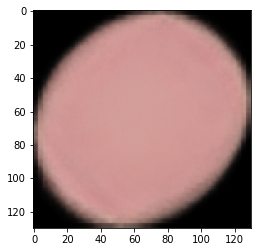

The Original: 


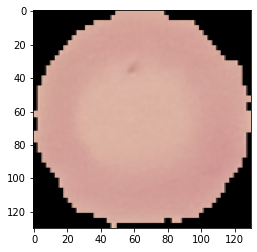

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


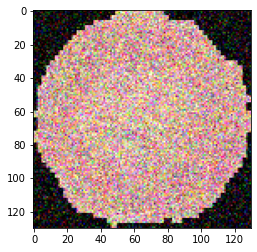

After going through denoiser


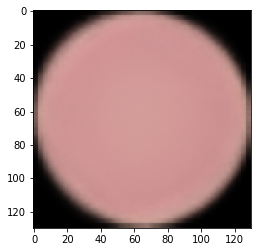

The Original: 


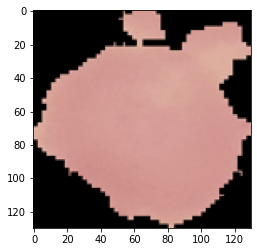

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


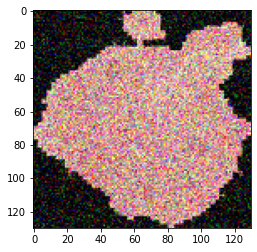

After going through denoiser


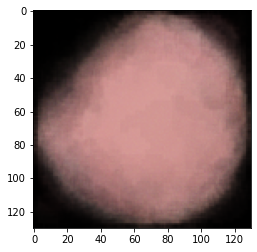

The Original: 


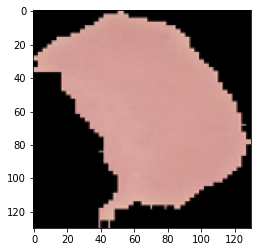

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


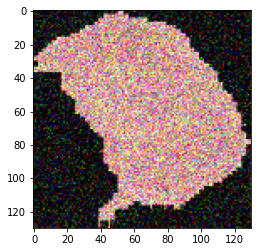

After going through denoiser


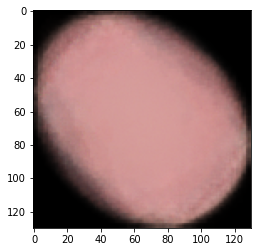

The Original: 


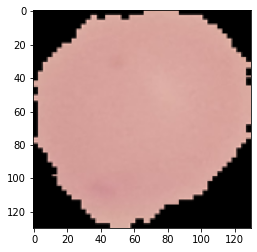

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


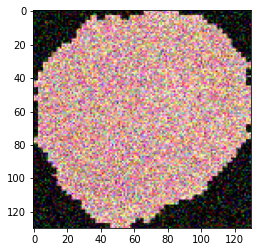

After going through denoiser


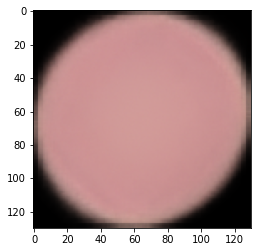

The Original: 


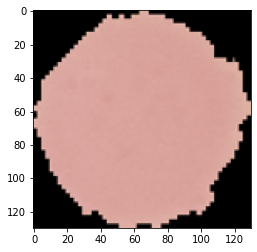

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


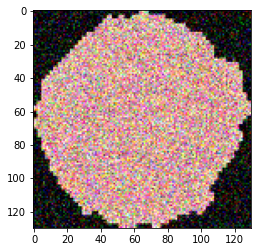

After going through denoiser


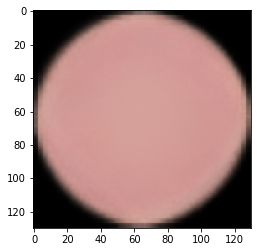

The Original: 


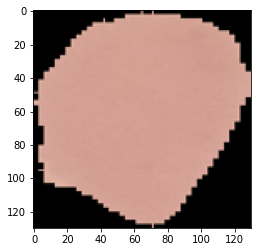

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


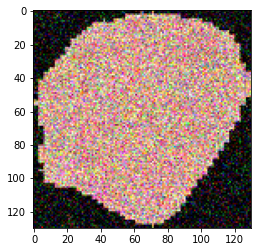

After going through denoiser


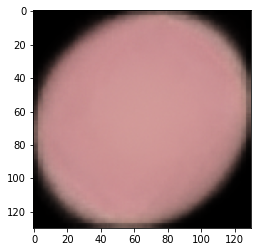

The Original: 


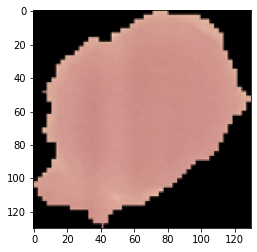

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


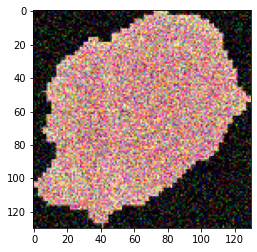

After going through denoiser


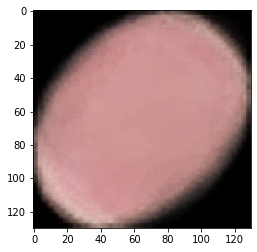

The Original: 


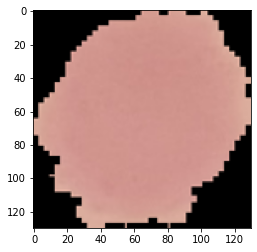

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The Noisey Version: 


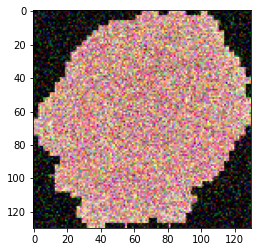

After going through denoiser


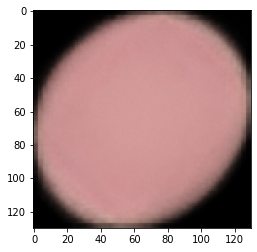

In [30]:
# let's look at 10 samples from test data, make them noisy and feed them to the model
for n in range(10):
    para_cell = test_path+'uninfected_reshaped/'+os.listdir(test_path+"/uninfected_reshaped")[n]
    para_img= imread(para_cell)
    print("The Original: ")
    plt.imshow(para_img)
    plt.show()
    print("The Noisey Version: ")
    plt.imshow(noisey_images[n])
    plt.show()
    print("After going through denoiser")
    plt.imshow(denoised[n])
    plt.show()